In [2]:
# https://plantcv.readthedocs.io/en/latest/transform_correct_color/
# Load in plantcv & other needed packages
from plantcv import plantcv as pcv
import cv2
from matplotlib.pylab import plt
import pandas as pd
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
import colorsys
import matplotlib.colors as colors
from plantcv import plantcv as pcv

class options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg= False
        self.result = "color_tutorial_results.json"
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

## Green Tree Color Analysis

In [3]:
img1 = imread('01EC9FED-3883-43B5-A83D-B117775EC03C-17_2_19.jpeg')

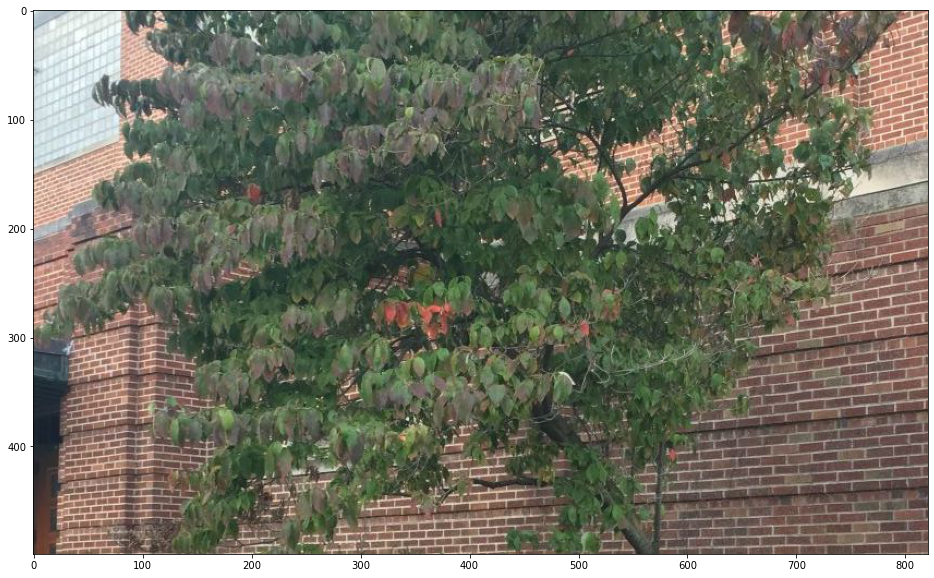

In [4]:
plt.figure(figsize=(20,10));
plt.imshow(img1)

In [5]:
hsv1 = colors.rgb_to_hsv(img1)

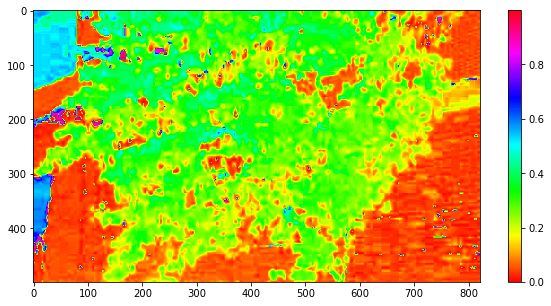

In [6]:
plt.figure(figsize=(10,5));
plt.imshow(hsv1[:,:,0], cmap='hsv');
plt.colorbar();

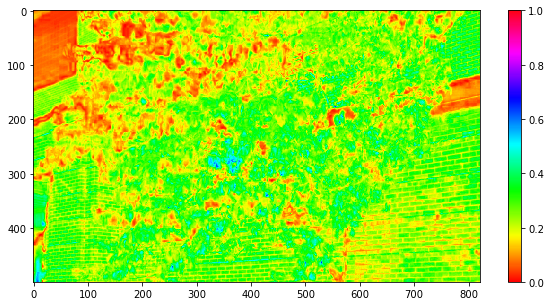

In [7]:
plt.figure(figsize=(10,5));
plt.imshow(hsv1[:,:,1], cmap='hsv');
plt.colorbar();

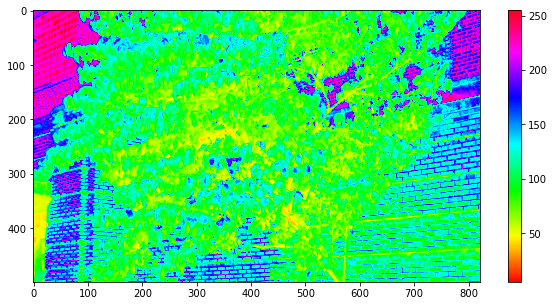

In [8]:
plt.figure(figsize=(10,5));
plt.imshow(hsv1[:,:,2], cmap='hsv');
plt.colorbar();

In [16]:
hmin= 0.2
hmax= 0.4
smin= 0
smax= 1
vmin= 0
vmax= 250

#hmin= 0
#hmax= 0.4
#smin= 0.2
#smax= 0.6
#vmin= 0
#vmax= 100

In [17]:
h1 = hsv1[:,:,0] > hmin 
h2 = hsv1[:,:,0] < hmax 
s1 = hsv1[:,:,1] > smin
s2 = hsv1[:,:,1] < smax
v1 = hsv1[:,:,2] > vmin
v2 = hsv1[:,:,2] < vmax

binary_image1 = h1 & h2 & s1 & s2 & v1 & v2 

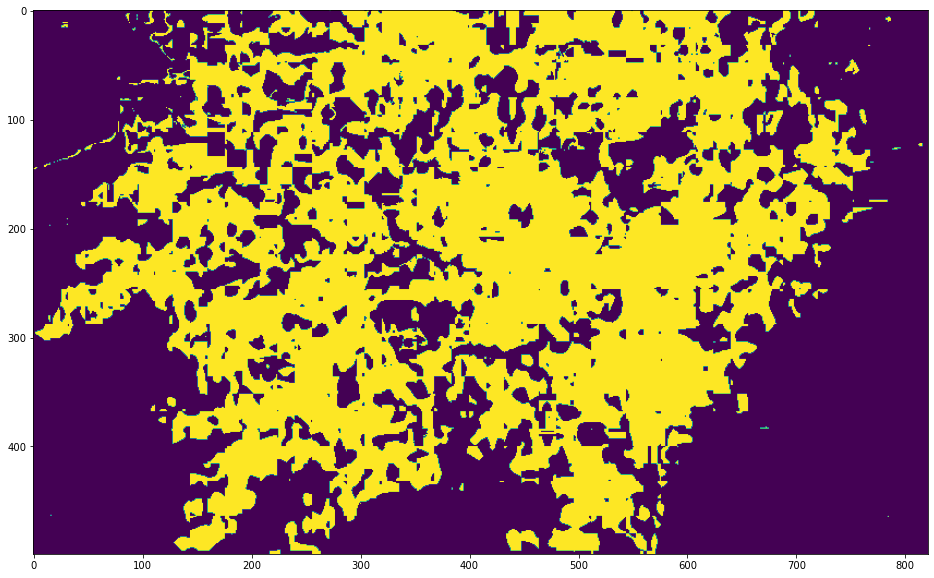

In [18]:
plt.figure(figsize=(20,10));
plt.imshow(binary_image1)

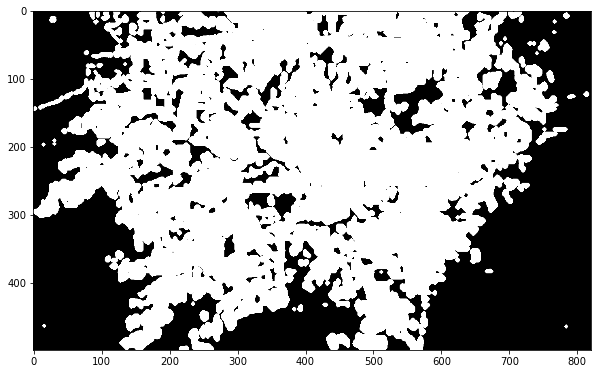

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [19]:
from scipy import ndimage


after_dialation1 = ndimage.binary_dilation(binary_image1, iterations=2)
plt.figure(figsize = (10,20));
plt.imshow(after_dialation1, cmap='gray', vmin=0, vmax=0.2);
plt.show()
print(after_dialation1)

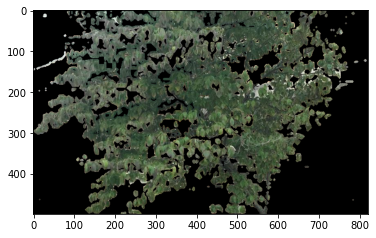

In [20]:
masked = pcv.apply_mask(img = img1, mask = after_dialation1, mask_color='black').astype(np.uint8)
plt.imshow(masked)

In [21]:
hue_value = masked[:,:,0]
saturation_value = masked[:,:,1]
color_value = masked[:,:,2]

In [22]:
hue_value.mean()

44.23151784689965

In [23]:
saturation_value.mean()

51.243270951159325

In [24]:
color_value.mean()

40.09572372516043

In [25]:
img2 = imread('0A54CE10-4126-4D5F-8172-06D8FFBDBAFF-15_29_29.jpeg')

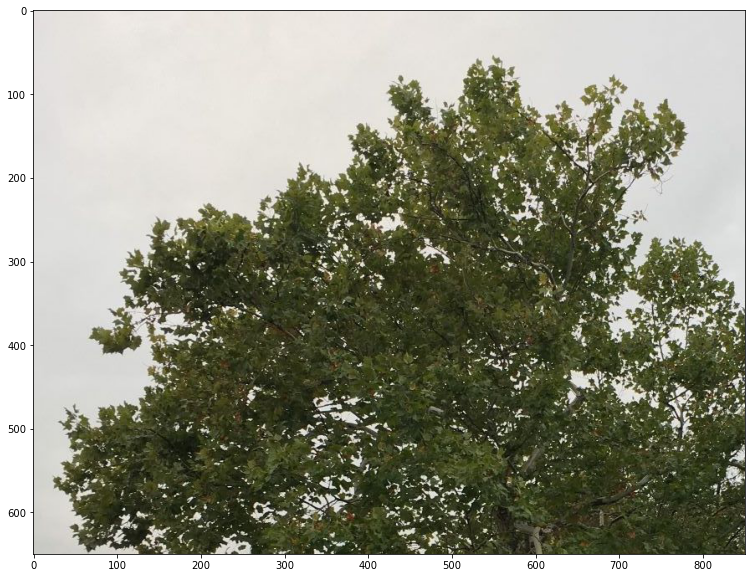

In [26]:
plt.figure(figsize=(20,10));
plt.imshow(img2)


In [27]:
hsv2 = colors.rgb_to_hsv(img2)

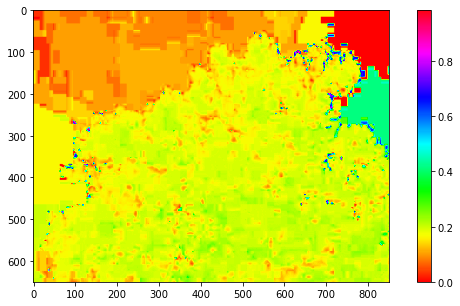

In [28]:
plt.figure(figsize=(10,5));
plt.imshow(hsv2[:,:,0], cmap='hsv');
plt.colorbar();

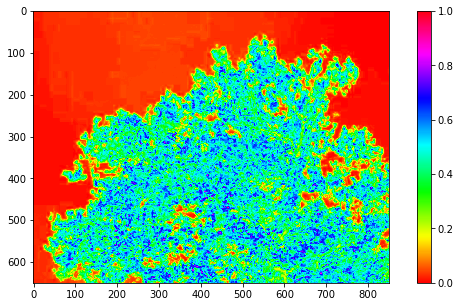

In [66]:
plt.figure(figsize=(10,5));
plt.imshow(hsv2[:,:,1], cmap='hsv');
plt.colorbar();

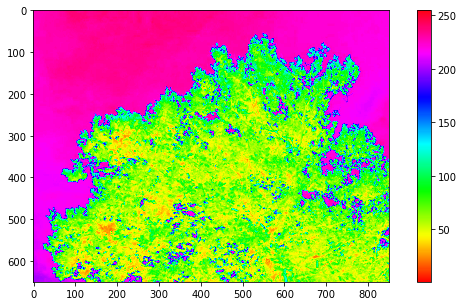

In [29]:
plt.figure(figsize=(10,5));
plt.imshow(hsv2[:,:,2], cmap='hsv');
plt.colorbar();

In [30]:
hmin= 0
hmax= 0.4
smin= 0.2
smax= 0.6
vmin= 0
vmax= 100

In [31]:
h1 = hsv2[:,:,0] > hmin 
h2 = hsv2[:,:,0] < hmax 
s1 = hsv2[:,:,1] > smin
s2 = hsv2[:,:,1] < smax
v1 = hsv2[:,:,2] > vmin
v2 = hsv2[:,:,2] < vmax

binary_image2 = h1 & h2 & s1 & s2 & v1 & v2 

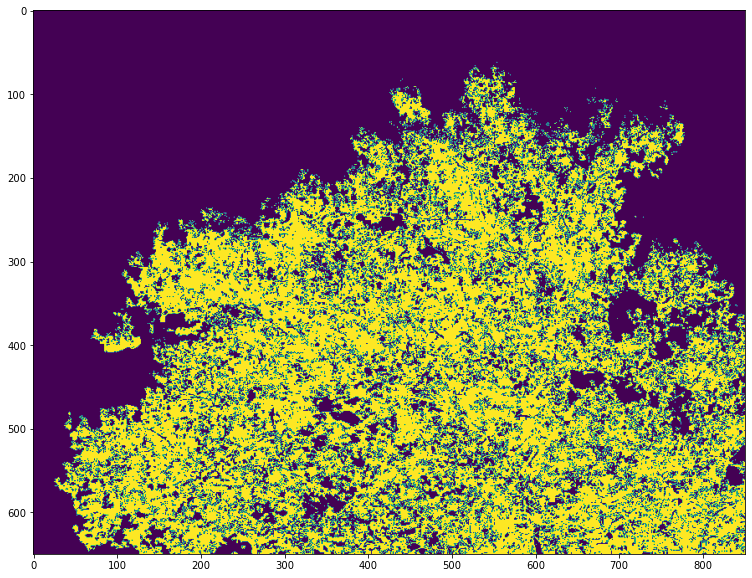

In [32]:
plt.figure(figsize=(20,10));
plt.imshow(binary_image2)

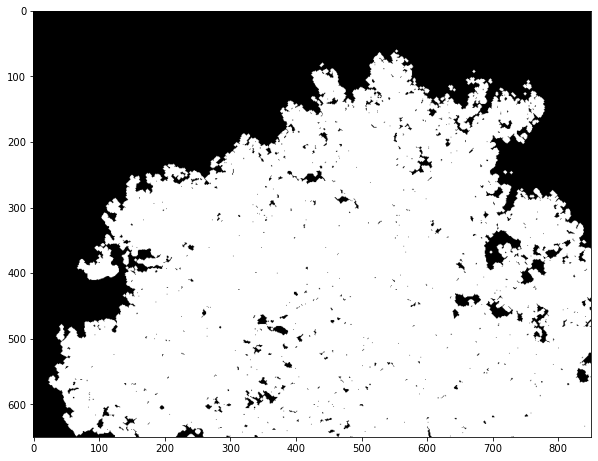

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


In [33]:
after_dialation2 = ndimage.binary_dilation(binary_image2, iterations=2)
plt.figure(figsize = (10,20));
plt.imshow(after_dialation2, cmap='gray', vmin=0, vmax=1);
plt.show()
print(after_dialation2)

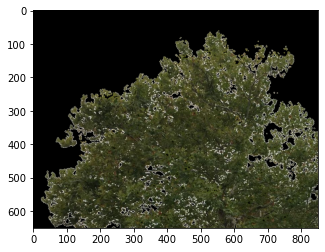

In [34]:
masked2 = pcv.apply_mask(img = img2, mask = after_dialation2, mask_color='black').astype(np.uint8)
plt.imshow(masked2)

In [35]:
hue_value2 = masked2[:,:,0]
saturation_value2 = masked2[:,:,1]
color_value2 = masked2[:,:,2]

In [36]:
hue_value2.mean()

43.783894061285366

In [37]:
saturation_value2.mean()

45.714355961312485

In [38]:
color_value2.mean()

28.78174997740215

## Red Tree Color Analysis

In [ ]:
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
import colorsys
import matplotlib.colors as colors
from plantcv import plantcv as pcv
import cv2 as cv

red1 = imread('/Users/Nick/Pictures/Redcrop1.jpeg')
red2 = imread('/Users/Nick/Pictures/Redcrop2.jpeg')
red3 = imread('/Users/Nick/Pictures/Redcrop3.jpeg')
red4 = imread('/Users/Nick/Pictures/Redcrop4.jpeg')
red5 = imread('/Users/Nick/Pictures/Redcrop5.jpeg')

#Create an HSV mask and masked img
mask, masked_img = pcv.threshold.custom_range(img=red1, lower_thresh=[111,60,60], upper_thresh=[255,255,255], channel='HSV')
print(mask)

plt.imshow(masked_img)

#Image Analysis
analysis_image = pcv.analyze_color(red1, mask=mask, hist_plot_type='all', label="default")

print(analysis_image)